In [32]:
# https://github.com/azmatabedi/SCADI_obesity_levels_Dataset
# https://www.sciencedirect.com/science/article/pii/S2352340919306985
import pandas as pd
# import warnings
# warning.simplefilter("ignore")
pd.options.mode.chained_assignment = None
data= pd.read_csv("Obesity.csv")

In [33]:
# data.dtypes
data.head()

,ID,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,2,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,3,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,4,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,5,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [34]:
data["NObeyesdad"].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [35]:
data["family_history_with_overweight"].replace("yes", 1, inplace=True)
data["family_history_with_overweight"].replace("no", 0, inplace=True)
data["NObeyesdad"].replace("Insufficient_Weight", 0, inplace=True)
data["NObeyesdad"].replace("Normal_Weight", 1, inplace=True)
data["NObeyesdad"].replace("Overweight_Level_I", 2, inplace=True)
data["NObeyesdad"].replace("Overweight_Level_II", 3, inplace=True)
data["NObeyesdad"].replace("Obesity_Type_I", 4, inplace=True)
data["NObeyesdad"].replace("Obesity_Type_II", 5, inplace=True)
data["NObeyesdad"].replace("Obesity_Type_III", 6, inplace=True)
data.head()

,ID,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,Female,21.0,1.62,64.0,1,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,1
1,2,Female,21.0,1.52,56.0,1,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,1
2,3,Male,23.0,1.80,77.0,1,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,1
3,4,Male,27.0,1.80,87.0,0,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,2
4,5,Male,22.0,1.78,89.8,0,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,3


## Correlation Coefficient

In [36]:
import numpy as np
import scipy
from scipy import stats
r, p = scipy.stats.pearsonr(data["family_history_with_overweight"],data["NObeyesdad"])
print(r, p)

0.5051484175624713 4.1407725692543867e-137


## Scatter plot 

<AxesSubplot:xlabel='NObeyesdad', ylabel='family_history_with_overweight'>

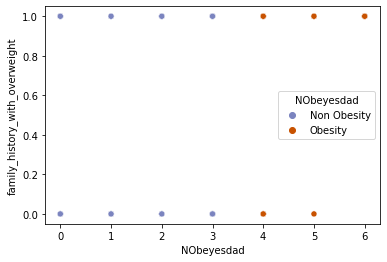

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
X = data["NObeyesdad"]
Y = data["family_history_with_overweight"]
obese = X > 3
obese = obese.map({True: 'Obesity', False: 'Non Obesity'})
color_dict = dict({'Obesity': '#C85200', 'Non Obesity':'#7B84BF' })
sns.scatterplot(x=X, y=Y, hue = obese, palette = color_dict)

## Simple Linear Regression

In [46]:
import statsmodels.api as sm
X_new = sm.add_constant(X)
regcorr = sm.OLS(Y, X_new)
stats = regcorr.fit()
print(stats.summary())

                                  OLS Regression Results                                  
Dep. Variable:     family_history_with_overweight   R-squared:                       0.255
Model:                                        OLS   Adj. R-squared:                  0.255
Method:                             Least Squares   F-statistic:                     722.5
Date:                            Thu, 03 Nov 2022   Prob (F-statistic):          4.14e-137
Time:                                    16:10:33   Log-Likelihood:                -675.78
No. Observations:                            2111   AIC:                             1356.
Df Residuals:                                2109   BIC:                             1367.
Df Model:                                       1                                         
Covariance Type:                        nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

#### The best-fit line equation is Y = 0.512 + 0.098X

## Multiple Linear Regression

In [49]:
features = ["family_history_with_overweight", "Age", "FCVC", "NCP","CH2O"]
label = ["NObeyesdad"]
X = data[features]
Y = data[label]
X_new = sm.add_constant(X)
regcorr = sm.OLS(Y, X_new)
stats = regcorr.fit()
print(stats.summary())

                            OLS Regression Results                            
Dep. Variable:             NObeyesdad   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     211.9
Date:                Thu, 03 Nov 2022   Prob (F-statistic):          2.13e-183
Time:                        16:23:19   Log-Likelihood:                -4011.9
No. Observations:                2111   AIC:                             8036.
Df Residuals:                    2105   BIC:                             8070.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       